In [1]:
from importlib import reload
import numpy as np
pi=np.pi
#
import matplotlib.pyplot as plt
import matplotlib as mpl

from functools import partial
import copy

In [2]:
import phasr as phr

In [3]:
phr.__version__

'0.3.1.dev0+gea06a1e.d20250207'

# High partial waves

In [4]:
def weak_density_model(r,lam,nucleus): return (nucleus.Qw/nucleus.Z)*lam**3*nucleus.charge_density(lam*r)

In [5]:
Pb208_test1 = phr.nucleus('Pb208_test_100',Z=82,A=208,c=6.4,z=0.54,w=0.32)
Pb208_test1.weak_density = partial(weak_density_model,lam=1.00,nucleus=Pb208_test1)
Pb208_test1.update_dependencies()
Pb208_test1.fill_gaps()
Pb208_test2 = phr.nucleus('Pb208_test_095',Z=82,A=208,c=6.4,z=0.54,w=0.32)
Pb208_test2.weak_density = partial(weak_density_model,lam=0.9502,nucleus=Pb208_test2)
Pb208_test2.update_dependencies()
Pb208_test2.fill_gaps()

data loaded from  ./tmp/nucleus_splines/electric_field_Pb208_test_100fermi3p_x=0.0-20.0-0.02.txt
data loaded from  ./tmp/nucleus_splines/electric_potential_Pb208_test_100fermi3p_x=0.0-20.0-0.02.txt
data loaded from  ./tmp/nucleus_splines/form_factor_Pb208_test_100fermi3p_x=0.0-1000.0-1.0.txt
data loaded from  ./tmp/nucleus_splines/electric_field_Pb208_test_095fermi3p_x=0.0-20.0-0.02.txt
data loaded from  ./tmp/nucleus_splines/electric_potential_Pb208_test_095fermi3p_x=0.0-20.0-0.02.txt
data loaded from  ./tmp/nucleus_splines/form_factor_Pb208_test_095fermi3p_x=0.0-1000.0-1.0.txt


In [6]:
beginning_radius_fm,electric_potential_V0,energy,mass,Z = 0.0121, -0.1291961769648503, 3000, 0, 82
#for kappa in range(-1,-200,-1):
kappa=-115
y0 = phr.dirac_solvers.base.initial_values_fm_norm(beginning_radius_fm,electric_potential_V0,energy,mass,kappa,Z)
y0

array([-1.24513523e-197,  1.00000000e-200])

In [7]:
kappa=-115
E_MeV=3000
partial_wave_kappa = phr.continuumstates(Pb208_test1,kappa,E_MeV,lepton_mass=0,verbose=True,**{'method': 'DOP853', 'atol': 1e-13, 'rtol': 1e-13, 'energy_norm': 1.3269804})
partial_wave_kappa.extract_phase_shift()
print(partial_wave_kappa.phase_difference)
partial_wave_kappa.solve_IVP()

r0= 0.0121 fm
rc= 12.6 fm
y0= [-1.24513523e-47  1.00000000e-50]
g_c (unnormalized) = 6.451330226813557e+16
f_c (unnormalized) = -2.9407223679543704e+16
A/B= 10.054633469306161
-0.0009059361093786134
y0= [-1.24513523e-47  1.00000000e-50]
g_c (unnormalized) = 7.6325220932094515e+214
f_c (unnormalized) = -3.4791473470261546e+214
A/B= 10.054633469629172
 A = -4.469304815854072e+214
 B = -4.4450201286341926e+213
norm 4.913786553872096e+214


(0.0, 15.0)

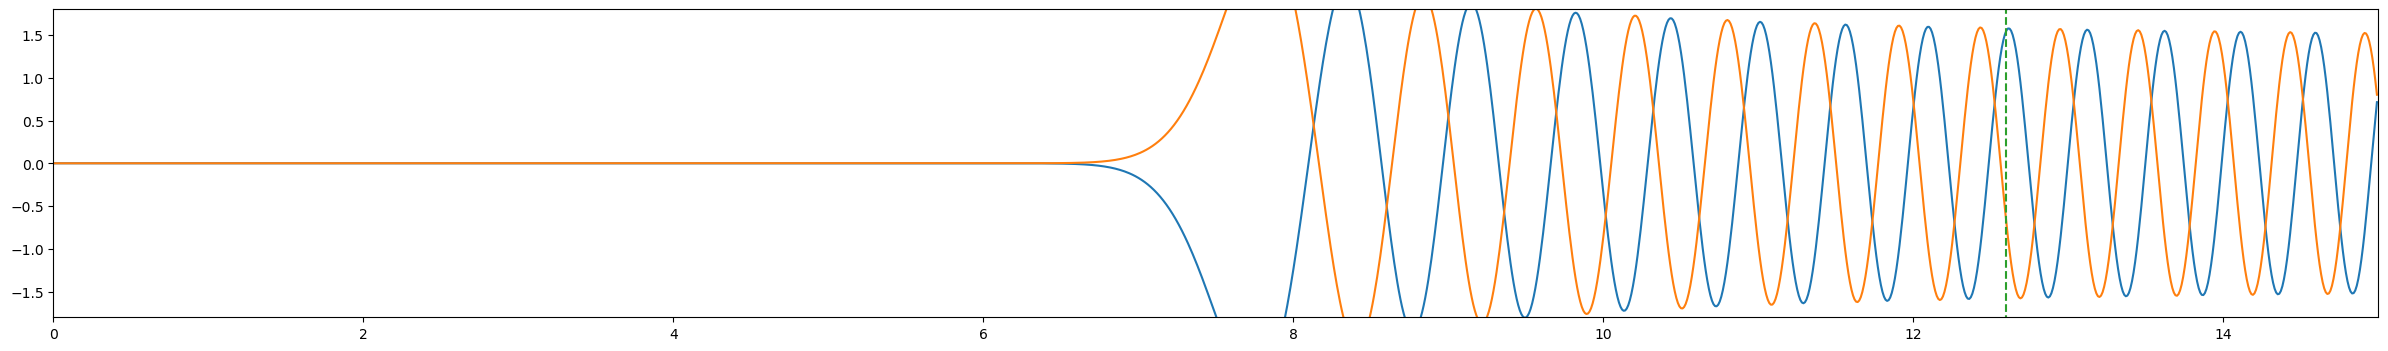

In [8]:
r=np.arange(0,15,1e-2)
plt.figure(figsize=(2*15,2*2))
plt.plot(r,partial_wave_kappa.wavefct_g(r))
plt.plot(r,partial_wave_kappa.wavefct_f(r))
plt.plot([12.6,12.6],[-2,+2],linestyle='--')
plt.ylim(-1.8,1.8)
plt.xlim(0,15)

In [9]:
kappa=-115
E_MeV=3000
partial_wave_kappa = phr.continuumstates(Pb208_test1,kappa,E_MeV,lepton_mass=0,verbose=True,**{'method': 'DOP853', 'atol': 1e-13, 'rtol': 1e-13, 'energy_norm': 1.973269804})
partial_wave_kappa.extract_phase_shift()
partial_wave_kappa.phase_difference

r0= 0.0121 fm
rc= 12.6 fm
y0= [-1.24513523e-47  1.00000000e-50]
g_c (unnormalized) = 3.1536001681239393e+96
f_c (unnormalized) = -1.4375116802178958e+96
A/B= 10.054633469684937


-0.0009059361093473051

# Kinematik of the experiments

In [7]:
#Pb: 
q_Pb = np.sqrt(0.00616*1e6)
theta_Pb = 4.7*pi/180 #L: 4.71(2) R: 4.67(2)
print(q_Pb)
#Ca: 
q_Ca = np.sqrt(0.0297*1e6)
theta_Ca = 4.51*pi/180
print(q_Ca)
#Al:
q_Al = np.sqrt(0.02357*1e6)
theta_Al = 7.61*pi/180
print(q_Al)

78.48566748139433
172.33687939614086
153.52524222420234


In [8]:
#Pb:
#approx
print(q_Pb/(2*np.sin(theta_Pb/2)))
#approx
#Ca: 
#approx
print(q_Ca/(2*np.sin(theta_Ca/2)))
#Al:
#approx
print(q_Al/(2*np.sin(theta_Al/2)))

957.0550135868299
2189.961300796471
1156.7434233585843


# Horowitz

In [10]:
def weak_density_model(r,lam,nucleus): return (nucleus.Qw/nucleus.Z)*lam**3*nucleus.charge_density(lam*r)

## Pb208

In [11]:
Pb208_c=phr.nucleus('Phb208_c',A=208,Z=82)

In [12]:
Pb208_test1 = phr.nucleus('Pb208_test_100',Z=82,A=208,c=6.4,z=0.54,w=0.32)
Pb208_test1.weak_density = partial(weak_density_model,lam=1.00,nucleus=Pb208_test1)
Pb208_test1.update_dependencies()
Pb208_test1.fill_gaps()
Pb208_test2 = phr.nucleus('Pb208_test_095',Z=82,A=208,c=6.4,z=0.54,w=0.32)
Pb208_test2.weak_density = partial(weak_density_model,lam=0.9502,nucleus=Pb208_test2)
Pb208_test2.update_dependencies()
Pb208_test2.fill_gaps()

data loaded from  ./tmp/nucleus_splines/electric_field_Pb208_test_100fermi3p_x=0.0-20.0-0.02.txt
data loaded from  ./tmp/nucleus_splines/electric_potential_Pb208_test_100fermi3p_x=0.0-20.0-0.02.txt
data loaded from  ./tmp/nucleus_splines/form_factor_Pb208_test_100fermi3p_x=0.0-1000.0-1.0.txt
data loaded from  ./tmp/nucleus_splines/electric_field_Pb208_test_095fermi3p_x=0.0-20.0-0.02.txt
data loaded from  ./tmp/nucleus_splines/electric_potential_Pb208_test_095fermi3p_x=0.0-20.0-0.02.txt
data loaded from  ./tmp/nucleus_splines/form_factor_Pb208_test_095fermi3p_x=0.0-1000.0-1.0.txt


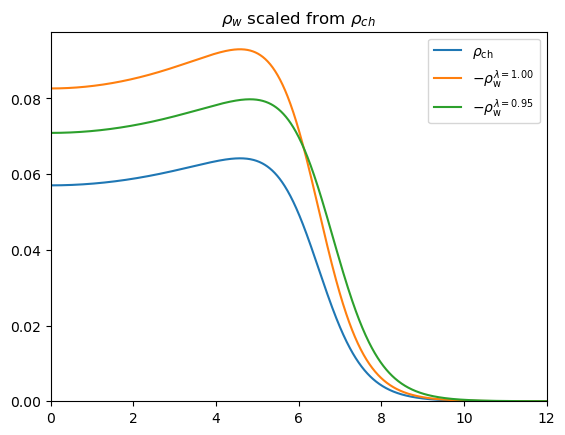

In [13]:
r=np.arange(0,12,1e-2)
plt.title(r'$\rho_w$ scaled from $\rho_{ch}$')
plt.plot(r,Pb208_test1.charge_density(r),label=r'$\rho_\operatorname{ch}$')
plt.plot(r,-Pb208_test1.weak_density(r),label=r'$-\rho_\operatorname{w}^{\lambda=1.00}$')
plt.plot(r,-Pb208_test2.weak_density(r),label=r'$-\rho_\operatorname{w}^{\lambda=0.95}$')
plt.xlim(0,12)
plt.ylim(0,)
plt.legend()

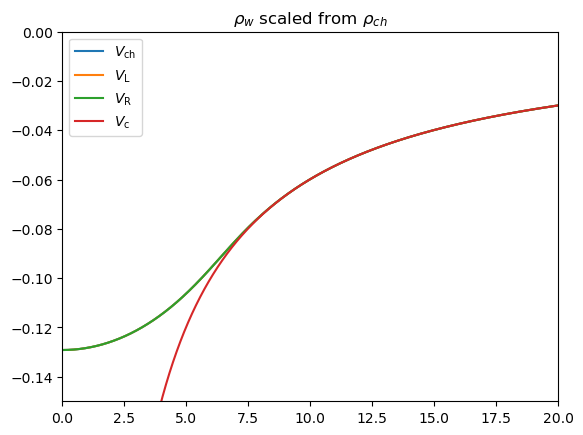

In [14]:
r=np.arange(0,20,1e-2)
plt.title(r'$\rho_w$ scaled from $\rho_{ch}$')
plt.plot(r,Pb208_test1.electric_potential(r),label=r'$V_\operatorname{ch}$')
plt.plot(r,Pb208_test1.electric_potential(r)-Pb208_test1.weak_potential(r),label=r'$V_\operatorname{L}$')
plt.plot(r,Pb208_test1.electric_potential(r)+Pb208_test1.weak_potential(r),label=r'$V_\operatorname{R}$')
plt.plot(r[r>0],Pb208_c.electric_potential(r[r>0]),label=r'$V_\operatorname{c}$')
plt.xlim(0,20)
plt.ylim(-0.15,0)
plt.legend()

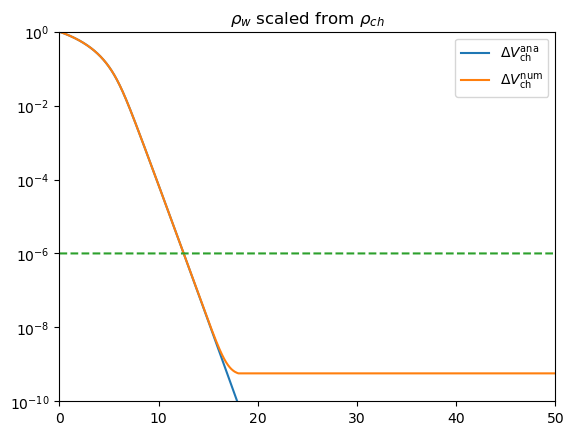

In [15]:
r=np.arange(1e-2,50,1e-2)
plt.title(r'$\rho_w$ scaled from $\rho_{ch}$')
plt.plot(r,np.abs((Pb208_test1.electric_potential_ana(r)-Pb208_c.electric_potential(r))/Pb208_c.electric_potential(r)),label=r'$\Delta V^\operatorname{ana}_\operatorname{ch}$')
plt.plot(r,np.abs((Pb208_test1.electric_potential(r)-Pb208_c.electric_potential(r))/Pb208_c.electric_potential(r)),label=r'$\Delta V^\operatorname{num}_\operatorname{ch}$')
plt.plot(r,r*0+1e-6,linestyle='--')
plt.xlim(0,50)
plt.ylim(1e-10,1)
plt.yscale('log')
plt.legend()

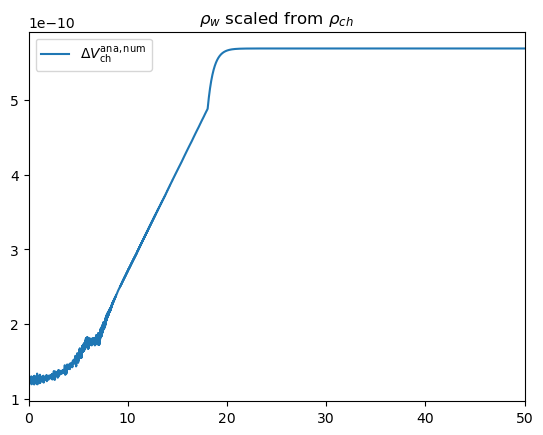

In [16]:
r=np.arange(1e-2,50,1e-2)
plt.title(r'$\rho_w$ scaled from $\rho_{ch}$')
plt.plot(r,(Pb208_test1.electric_potential_ana(r)-Pb208_test1.electric_potential(r))/Pb208_test1.electric_potential(r),label=r'$\Delta V^\operatorname{ana,num}_\operatorname{ch}$')
#plt.plot(r,r*0+1e-6,linestyle='--')
plt.xlim(0,50)
#plt.ylim(1e-10,1)
#plt.yscale('log')
plt.legend()

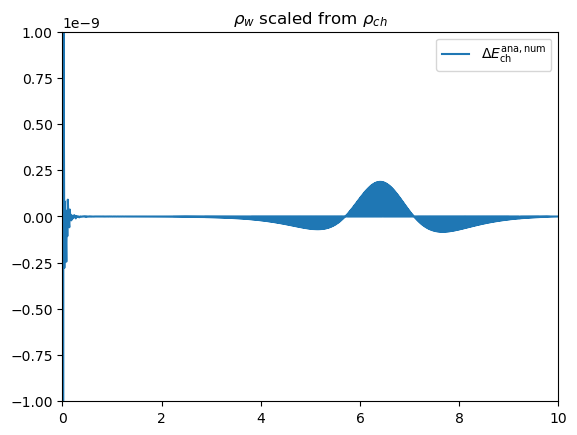

In [17]:
r=np.arange(1e-2,10,1e-2)
plt.title(r'$\rho_w$ scaled from $\rho_{ch}$')
plt.plot(r,(Pb208_test1.electric_field_ana(r)-Pb208_test1.electric_field(r))/Pb208_test1.electric_field(r),label=r'$\Delta E^\operatorname{ana,num}_\operatorname{ch}$')
#plt.plot(r,r*0+1e-6,linestyle='--')
plt.xlim(0,10)
plt.ylim(-1e-9,1e-9)
#plt.yscale('log')
plt.legend()

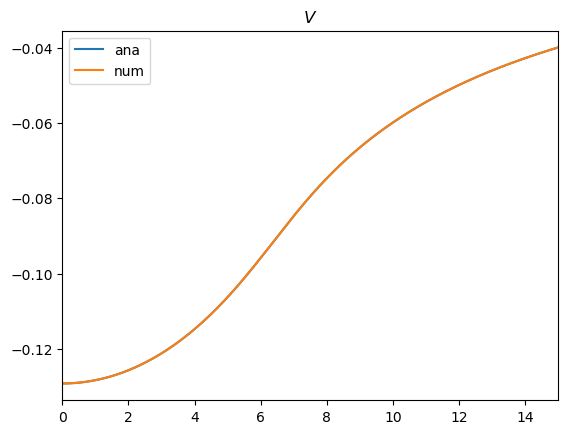

In [18]:
r=np.arange(0,15,1e-2)
plt.title(r'$V$')
plt.plot(r,Pb208_test1.electric_potential_ana(r),label=r'ana')
plt.plot(r,Pb208_test1.electric_potential(r),label=r'num')
plt.xlim(0,15)
#plt.ylim(-0.13,-0.12)
plt.legend()

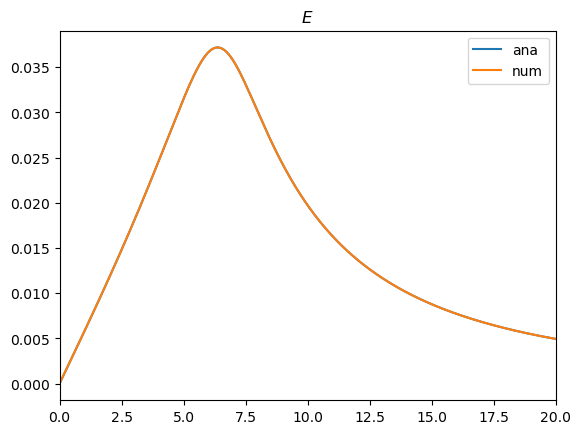

In [19]:
r=np.arange(1e-3,20,1e-2)
plt.title(r'$E$')
plt.plot(r,Pb208_test1.electric_field_ana(r),label=r'ana')
plt.plot(r,Pb208_test1.electric_field(r),label=r'num')
plt.xlim(0,20)
#plt.ylim(0,)
plt.legend()

In [20]:
print(Pb208_test1.Vmin)
print(Pb208_test1.Vmin_ana)

-0.1291961769648503
-0.1291961769809547


## He4

In [21]:
He4_c = phr.nucleus('He4_c',Z=2,A=4)

In [22]:
He4_test1 = phr.nucleus('He4_test_100',Z=2,A=4,c=1.008,z=0.327,w=0.445)
He4_test1.weak_density = partial(weak_density_model,lam=1.00,nucleus=He4_test1)
He4_test1.update_dependencies()
He4_test1.fill_gaps()
He4_test2 = phr.nucleus('He4_test_095',Z=2,A=4,c=1.008,z=0.327,w=0.445)
He4_test2.weak_density = partial(weak_density_model,lam=1./0.99,nucleus=He4_test2) # unclear what value for lambda
He4_test2.update_dependencies()
He4_test2.fill_gaps()

data loaded from  ./tmp/nucleus_splines/electric_field_He4_test_100fermi3p_x=0.0-20.0-0.02.txt
data loaded from  ./tmp/nucleus_splines/electric_potential_He4_test_100fermi3p_x=0.0-20.0-0.02.txt
data loaded from  ./tmp/nucleus_splines/form_factor_He4_test_100fermi3p_x=0.0-1000.0-1.0.txt
data loaded from  ./tmp/nucleus_splines/electric_field_He4_test_095fermi3p_x=0.0-20.0-0.02.txt
data loaded from  ./tmp/nucleus_splines/electric_potential_He4_test_095fermi3p_x=0.0-20.0-0.02.txt
data loaded from  ./tmp/nucleus_splines/form_factor_He4_test_095fermi3p_x=0.0-1000.0-1.0.txt


In [23]:
He4_test2.weak_radius/He4_test2.charge_radius

0.99

In [24]:
He4_test2.charge_radius

1.7168331457341202

In [25]:
He4_test2.weak_radius

1.699664814276779

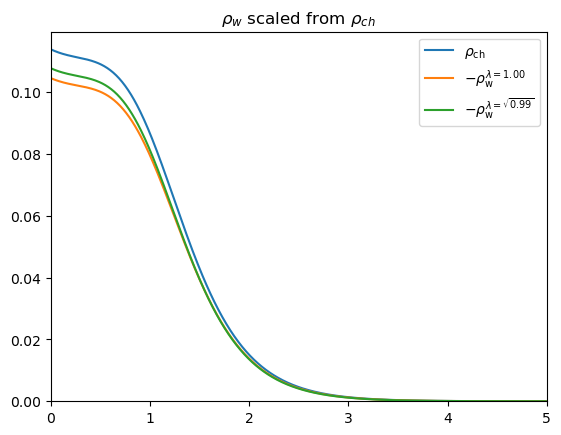

In [26]:
r=np.arange(0,5,1e-2)
plt.title(r'$\rho_w$ scaled from $\rho_{ch}$')
plt.plot(r,He4_test1.charge_density(r),label=r'$\rho_\operatorname{ch}$')
plt.plot(r,-He4_test1.weak_density(r),label=r'$-\rho_\operatorname{w}^{\lambda=1.00}$')
plt.plot(r,-He4_test2.weak_density(r),label=r'$-\rho_\operatorname{w}^{\lambda=\sqrt{0.99}}$')
plt.xlim(0,5)
plt.ylim(0,)
plt.legend()

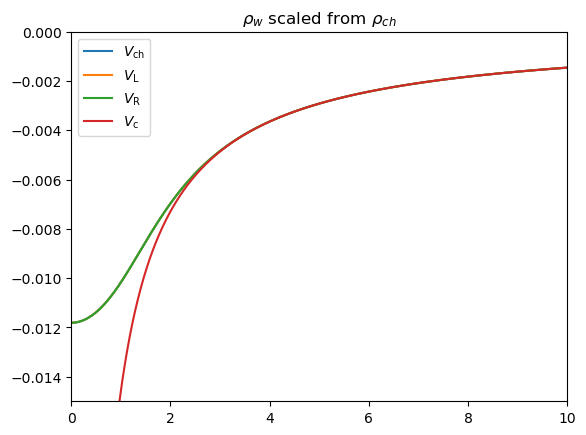

In [27]:
r=np.arange(0,10,1e-2)
plt.title(r'$\rho_w$ scaled from $\rho_{ch}$')
plt.plot(r,He4_test1.electric_potential(r),label=r'$V_\operatorname{ch}$')
plt.plot(r,He4_test1.electric_potential(r)-He4_test1.weak_potential(r),label=r'$V_\operatorname{L}$')
plt.plot(r,He4_test1.electric_potential(r)+He4_test1.weak_potential(r),label=r'$V_\operatorname{R}$')
plt.plot(r[r>0],He4_c.electric_potential(r[r>0]),label=r'$V_\operatorname{c}$')
plt.xlim(0,10)
plt.ylim(-0.015,0)
plt.legend()

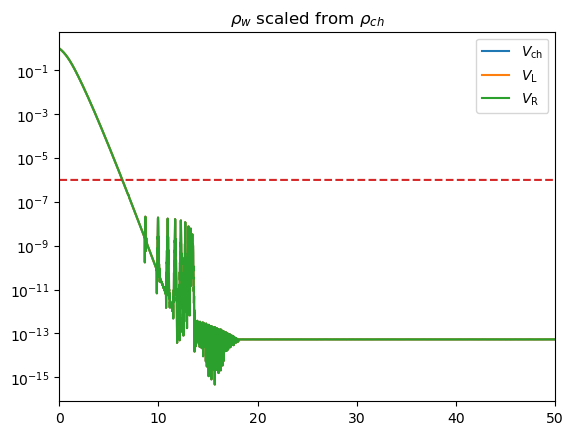

In [28]:
r=np.arange(1e-2,50,1e-2)
plt.title(r'$\rho_w$ scaled from $\rho_{ch}$')
plt.plot(r,np.abs((He4_test1.electric_potential(r)-He4_c.electric_potential(r))/He4_c.electric_potential(r)),label=r'$V_\operatorname{ch}$')
plt.plot(r,np.abs((He4_test1.electric_potential(r)-He4_test1.weak_potential(r)-He4_c.electric_potential(r))/He4_c.electric_potential(r)),label=r'$V_\operatorname{L}$')
plt.plot(r,np.abs((He4_test1.electric_potential(r)+He4_test1.weak_potential(r)-He4_c.electric_potential(r))/He4_c.electric_potential(r)),label=r'$V_\operatorname{R}$')
plt.plot(r,r*0+1e-6,linestyle='--')
plt.xlim(0,50)
#plt.ylim(1e-12,1)
plt.yscale('log')
plt.legend()

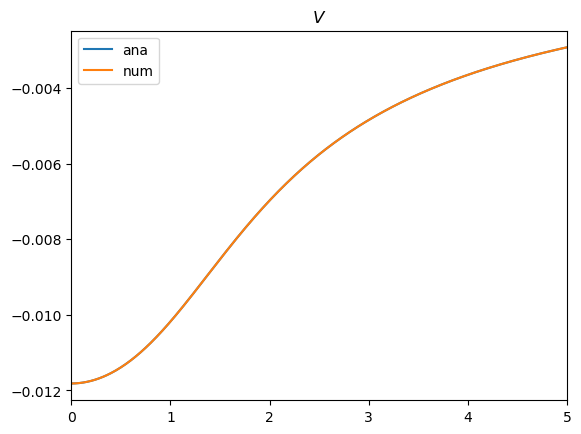

In [29]:
r=np.arange(0,5,1e-2)
plt.title(r'$V$')
plt.plot(r,He4_test1.electric_potential_ana(r),label=r'ana')
plt.plot(r,He4_test1.electric_potential(r),label=r'num')
plt.xlim(0,5)
#plt.ylim(-0.13,-0.12)
plt.legend()

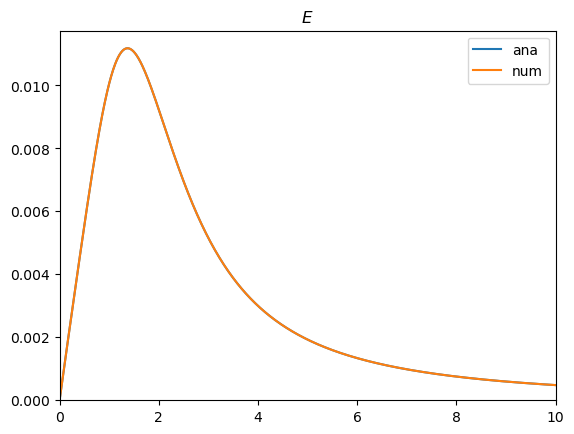

In [30]:
r=np.arange(1e-3,10,1e-2)
plt.title(r'$E$')
plt.plot(r,He4_test1.electric_field_ana(r),label=r'ana')
plt.plot(r,He4_test1.electric_field(r),label=r'num')
plt.xlim(0,10)
plt.ylim(0,)
plt.legend()

In [31]:
print(He4_test1.Vmin)
print(He4_test1.Vmin_ana)

-0.01181459414191814
-0.011814594146245952


# A_PV (compare Horowitz 1998)

## Pb208

### Optimise settings

In [31]:
Pb208_ref_test = phr.nuclei.references.load_reference_nucleus(82,208)[0]
Pb208_ref_test.weak_density = partial(weak_density_model,lam=1.00,nucleus=Pb208_ref_test)
Pb208_ref_test.update_dependencies()

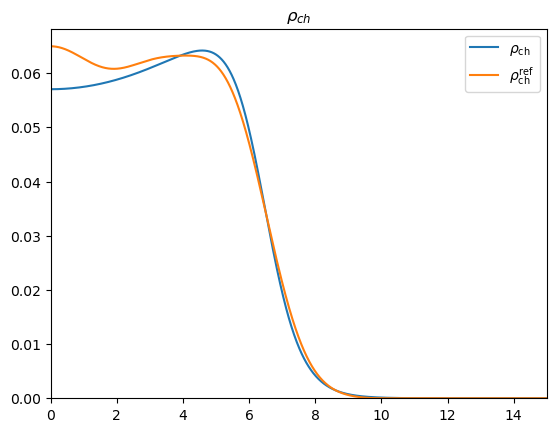

In [32]:
r=np.arange(0,15,1e-2)
plt.title(r'$\rho_{ch}$')
plt.plot(r,Pb208_test1.charge_density(r),label=r'$\rho_\operatorname{ch}$')
plt.plot(r,Pb208_ref_test.charge_density(r),label=r'$\rho^\operatorname{ref}_\operatorname{ch}$')
plt.xlim(0,15)
plt.ylim(0,)
plt.legend()

In [34]:
theta_deg=np.arange(1,50,1e-1)
E_MeV=850
A_PV_ref_test = phr.dirac_solvers.post_processing.crosssection.left_right_asymmetry_lepton_nucleus_scattering(E_MeV,theta_deg*pi/180,Pb208_ref_test,verbose=True)

Calculate left crosssection ...
E= 846.2705639962488 MeV
r0= 0.0107 fm
rc= 11.3 fm
Calculate phaseshift for kappa= -1 , delta_diff= 1.0457583594424502
Calculate phaseshift for kappa= -2 , delta_diff= -1.4129871262783436
Calculate phaseshift for kappa= -3 , delta_diff= -1.1064016064609472
Calculate phaseshift for kappa= -4 , delta_diff= -0.907763895974262
Calculate phaseshift for kappa= -5 , delta_diff= -0.76166398705276
Calculate phaseshift for kappa= -6 , delta_diff= -0.6470124641854689
Calculate phaseshift for kappa= -7 , delta_diff= -0.5534883914710789
Calculate phaseshift for kappa= -8 , delta_diff= -0.4752579151690064
Calculate phaseshift for kappa= -9 , delta_diff= -0.4086956031909432
Calculate phaseshift for kappa= -10 , delta_diff= -0.3513905736450367
Calculate phaseshift for kappa= -11 , delta_diff= -0.30165516957369776
Calculate phaseshift for kappa= -12 , delta_diff= -0.25825874524649084
Calculate phaseshift for kappa= -13 , delta_diff= -0.2202730346419255
Calculate phaseshi

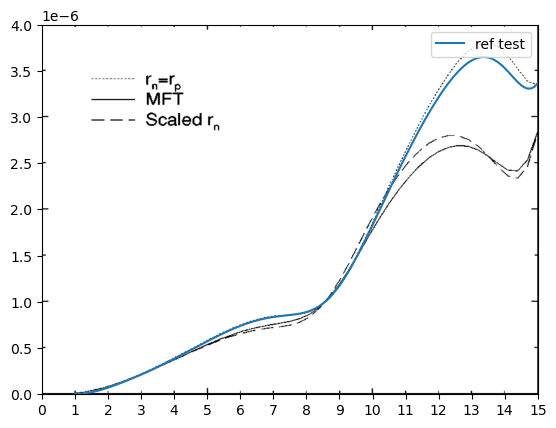

In [35]:
img = plt.imread("../data_electronscattering/Pb208_ACP_ref.png")
#plt.figure(figsize=(10,10))
plt.imshow(img, extent=[0,15,0, 4e-6],aspect='auto')
#
plt.plot(theta_deg,A_PV_ref_test,label='ref test')
#
plt.xticks(np.arange(0,16,1))
plt.xlim(0,15)
plt.ylim(0,4e-6)
plt.legend()

In [146]:
theta_deg=np.arange(1,50,1e-1)
E_MeV=850
args_APV_Pb208=phr.dirac_solvers.post_processing.crosssection.optimise_left_right_asymmetry_precision(E_MeV,theta_deg*pi/180,Pb208_ref_test,left_right_asymmetry_precision=1e-2)

new best: {'method': 'DOP853', 'N_partial_waves': 120, 'atol': 1e-13, 'rtol': 1e-13, 'energy_norm': 197.3269804, 'phase_difference_limit': 0.0}
time: 68.65472865104675 diff: -0.0
new best: {'method': 'DOP853', 'N_partial_waves': 120, 'atol': 1e-13, 'rtol': 1e-13, 'energy_norm': 197.3269804, 'phase_difference_limit': 1e-15}
time: 65.36691164970398 diff: -0.0
new best: {'method': 'DOP853', 'N_partial_waves': 120, 'atol': 1e-13, 'rtol': 1e-13, 'energy_norm': 197.3269804, 'phase_difference_limit': 1e-14}
time: 62.64877223968506 diff: 2.409732765304056e-06
new best: {'method': 'DOP853', 'N_partial_waves': 120, 'atol': 1e-13, 'rtol': 1e-13, 'energy_norm': 197.3269804, 'phase_difference_limit': 1e-13}
time: 61.342159271240234 diff: 2.3846314094053963e-05
new best: {'method': 'DOP853', 'N_partial_waves': 120, 'atol': 1e-13, 'rtol': 1e-13, 'energy_norm': 197.3269804, 'phase_difference_limit': 1e-12}
time: 58.16401791572571 diff: 6.375751315805257e-06
new best: {'method': 'DOP853', 'N_partial_wa

In [36]:
args_APV_Pb208={'method': 'DOP853', 'N_partial_waves': 120, 'atol': 1e-13, 'rtol': 1e-13, 'energy_norm': 197.3269804, 'phase_difference_limit': 1e-09}

In [37]:
theta_deg=np.arange(1,50,1e-1)
E_MeV=850
A_PV_ref_test_opt = phr.dirac_solvers.post_processing.crosssection.left_right_asymmetry_lepton_nucleus_scattering(E_MeV,theta_deg*pi/180,Pb208_ref_test,verbose=False,**args_APV_Pb208)

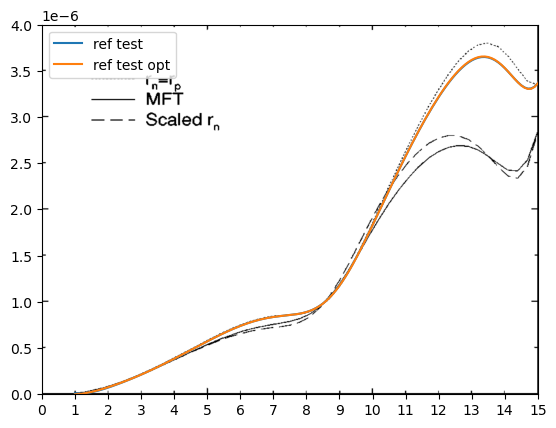

In [38]:
img = plt.imread("../data_electronscattering/Pb208_ACP_ref.png")
#plt.figure(figsize=(10,10))
plt.imshow(img, extent=[0,15,0, 4e-6],aspect='auto')
#
plt.plot(theta_deg,A_PV_ref_test,label='ref test')
plt.plot(theta_deg,A_PV_ref_test_opt,label='ref test opt')
#
plt.xticks(np.arange(0,16,1))
plt.xlim(0,15)
plt.ylim(0,4e-6)
plt.legend()

### Compare

In [32]:
args_APV_Pb208={'method': 'DOP853', 'N_partial_waves': 200, 'atol': 1e-13, 'rtol': 1e-13, 'energy_norm': 197.3269804, 'phase_difference_limit': 1e-09}

In [35]:
theta_deg=np.arange(1,50,1e-1)
E_MeV=850
print('Start')
A_PV1 = phr.dirac_solvers.post_processing.crosssection.left_right_asymmetry_lepton_nucleus_scattering(E_MeV,theta_deg*pi/180,Pb208_test1,verbose=True,**args_APV_Pb208)
print('APV1 done')
A_PV2 = phr.dirac_solvers.post_processing.crosssection.left_right_asymmetry_lepton_nucleus_scattering(E_MeV,theta_deg*pi/180,Pb208_test2,verbose=True,**args_APV_Pb208)
print('APV2 done')

Start
Calculate left crosssection ...
E= 846.2705639962488 MeV
r0= 0.0115 fm
rc= 12.6 fm
Calculate phaseshift for kappa= -1 , delta_diff=  1.045903705403628
Calculate phaseshift for kappa= -2 , delta_diff=  -1.4129033724530262
Calculate phaseshift for kappa= -3 , delta_diff=  -1.106295243497125
Calculate phaseshift for kappa= -4 , delta_diff=  -0.9076036243074457
Calculate phaseshift for kappa= -5 , delta_diff=  -0.7614301773398582
Calculate phaseshift for kappa= -6 , delta_diff=  -0.6466922637532679
Calculate phaseshift for kappa= -7 , delta_diff=  -0.5530739091010135
Calculate phaseshift for kappa= -8 , delta_diff=  -0.4747449399092414
Calculate phaseshift for kappa= -9 , delta_diff=  -0.40808250745487396
Calculate phaseshift for kappa= -10 , delta_diff=  -0.350677513687911
Calculate phaseshift for kappa= -11 , delta_diff=  -0.3008436924511315
Calculate phaseshift for kappa= -12 , delta_diff=  -0.25735188557617406
Calculate phaseshift for kappa= -13 , delta_diff=  -0.2192758184804368

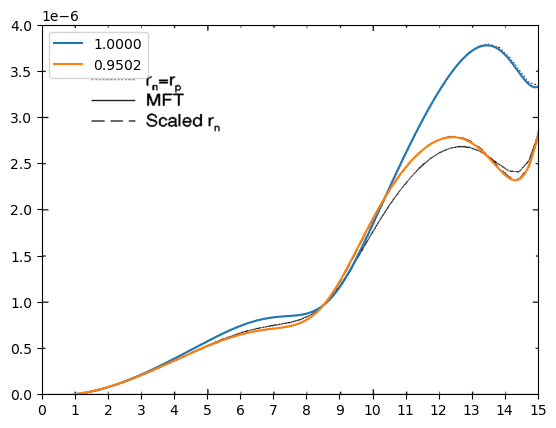

In [36]:
img = plt.imread("../data_electronscattering/Pb208_ACP_ref.png")
#plt.figure(figsize=(10,10))
plt.imshow(img, extent=[0,15.04,-0.01e-6, 3.99e-6],aspect='auto')
#
plt.plot(theta_deg,A_PV1,label='1.0000')
plt.plot(theta_deg,A_PV2,label='0.9502')
#
plt.xticks(np.arange(0,16,1))
plt.xlim(0,15)
plt.ylim(0,4e-6)
plt.legend()

(0.0, 5e-05)

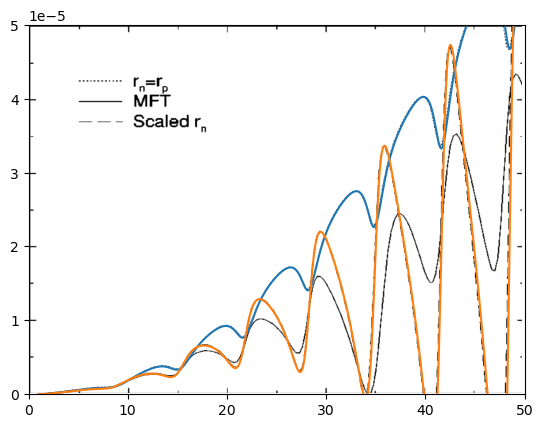

In [37]:
img = plt.imread("../data_electronscattering/Pb208_ACP_ref2.png")
#plt.figure(figsize=(10,10))
plt.imshow(img, extent=[0.1,49.6,0.02e-5, 4.98e-5],aspect='auto')
#
#
plt.plot(theta_deg,A_PV1,label='1.0000')
plt.plot(theta_deg,A_PV2,label='0.9502')
#
#plt.xticks(np.arange(0,16,1))
plt.xlim(0,50)
plt.ylim(0,5e-5)
#plt.legend()

In [33]:
theta_deg=np.arange(1,50,1e-1)
E3_MeV=3000
A_PV_3000 = phr.dirac_solvers.post_processing.crosssection.left_right_asymmetry_lepton_nucleus_scattering(E3_MeV,theta_deg*pi/180,Pb208_test1,verbose=True,**{'method': 'DOP853', 'N_partial_waves': 200, 'atol': 1e-13, 'rtol': 1e-13, 'energy_norm': 197.3269804, 'phase_difference_limit': 0.0})

Calculate left crosssection ...
E= 2953.543357738739 MeV
r0= 0.0115 fm
rc= 12.6 fm
Calculate phaseshift for kappa= -1 , delta_diff=  0.2984158815353837
Calculate phaseshift for kappa= -2 , delta_diff=  0.9825329078222047
Calculate phaseshift for kappa= -3 , delta_diff=  1.291358413113889
Calculate phaseshift for kappa= -4 , delta_diff=  1.493150748250899
Calculate phaseshift for kappa= -5 , delta_diff=  -1.4982880828494798
Calculate phaseshift for kappa= -6 , delta_diff=  -1.378694956313805
Calculate phaseshift for kappa= -7 , delta_diff=  -1.2793526004810292
Calculate phaseshift for kappa= -8 , delta_diff=  -1.1944382035544212
Calculate phaseshift for kappa= -9 , delta_diff=  -1.1203377180005192
Calculate phaseshift for kappa= -10 , delta_diff=  -1.0546524265297013
Calculate phaseshift for kappa= -11 , delta_diff=  -0.9957081966823833
Calculate phaseshift for kappa= -12 , delta_diff=  -0.9422899799452207
Calculate phaseshift for kappa= -13 , delta_diff=  -0.8934878211097188
Calculate 

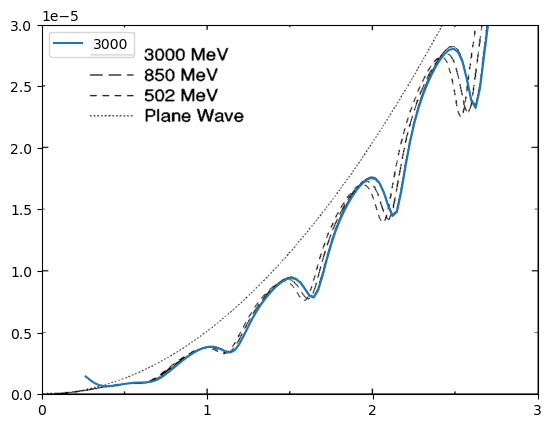

In [34]:
img = plt.imread("../data_electronscattering/Pb208_ACP_ref3.png")
#plt.figure(figsize=(10,10))
plt.imshow(img, extent=[0,3,0, 3e-5],aspect='auto')
#
q3_fm = 2*E3_MeV/phr.constants.hc*np.sin(theta_deg/2*pi/180)
#
plt.plot(q3_fm,A_PV_3000,label='3000')
#plt.plot(q3_fm,A_PV_3000_norecoil,label='3000')
#
plt.xticks(np.arange(0,16,1))
plt.xlim(0,3)
plt.ylim(0,3e-5)
plt.legend()

In [79]:
theta_deg=np.arange(1,50,1e-1)
E3_MeV=3000
A_PV_3000_norecoil = phr.dirac_solvers.post_processing.crosssection.left_right_asymmetry_lepton_nucleus_scattering(E3_MeV,theta_deg*pi/180,Pb208_test1,verbose=True,recoil=False,**{'method': 'DOP853', 'N_partial_waves': 150, 'atol': 1e-13, 'rtol': 1e-13, 'energy_norm': 197.3269804, 'phase_difference_limit': 0.0})

Calculate left crosssection ...
r0= 0.0115 fm
rc= 19.900000000000002 fm
Calculate phaseshift for kappa= -1 , delta_diff= 0.2890789952379835
Calculate phaseshift for kappa= -2 , delta_diff= 0.9731997857810053
Calculate phaseshift for kappa= -3 , delta_diff= 1.2820315639765112
Calculate phaseshift for kappa= -4 , delta_diff= 1.4838326795646148
Calculate phaseshift for kappa= -5 , delta_diff= -1.5075948653933335
Calculate phaseshift for kappa= -6 , delta_diff= -1.3879879490031932
Calculate phaseshift for kappa= -7 , delta_diff= -1.288629302540563
Calculate phaseshift for kappa= -8 , delta_diff= -1.20369611707933
Calculate phaseshift for kappa= -9 , delta_diff= -1.1295743491262682
Calculate phaseshift for kappa= -10 , delta_diff= -1.0638652851758112
Calculate phaseshift for kappa= -11 , delta_diff= -1.004894797930223
Calculate phaseshift for kappa= -12 , delta_diff= -0.9514478436193969
Calculate phaseshift for kappa= -13 , delta_diff= -0.9026144733243373
Calculate phaseshift for kappa= -14

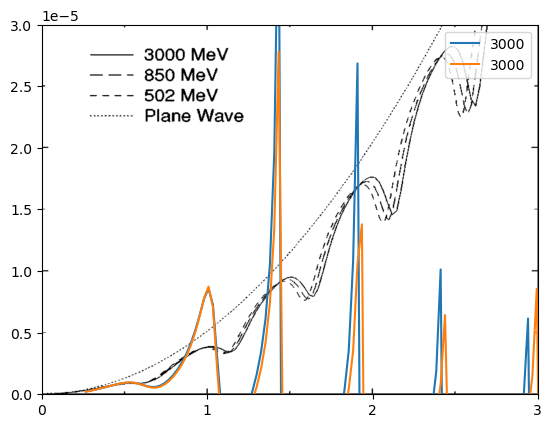

In [82]:
img = plt.imread("../data_electronscattering/Pb208_ACP_ref3.png")
#plt.figure(figsize=(10,10))
plt.imshow(img, extent=[0,3,0, 3e-5],aspect='auto')
#
q3_fm = 2*E3_MeV/phr.constants.hc*np.sin(theta_deg/2*pi/180)
#
plt.plot(q3_fm,A_PV_3000,label='3000')
#plt.plot(q3_fm,A_PV_3000_norecoil,label='3000')
#
plt.xticks(np.arange(0,16,1))
plt.xlim(0,3)
plt.ylim(0,3e-5)
plt.legend()

In [183]:
from scipy.special import spherical_jn

In [190]:
z0=3000*0.0115/phr.constants.hc
z0

0.17483670975993915

In [198]:
n=100
spherical_jn(n,z0)

1.3681960085118643e-265

In [139]:
theta_deg=np.arange(1,100,1e-1)
E1_MeV=502
E2_MeV=850
E3_MeV=3000
print('Start')
A_PV_502 = phr.dirac_solvers.post_processing.crosssection.left_right_asymmetry_lepton_nucleus_scattering(E1_MeV,theta_deg*pi/180,Pb208_test1,verbose=False,**args_APV_Pb208)
print('502 done')
A_PV_850 = phr.dirac_solvers.post_processing.crosssection.left_right_asymmetry_lepton_nucleus_scattering(E2_MeV,theta_deg*pi/180,Pb208_test1,verbose=False,**args_APV_Pb208)
print('850 done')
A_PV_3000 = phr.dirac_solvers.post_processing.crosssection.left_right_asymmetry_lepton_nucleus_scattering(E3_MeV,theta_deg*pi/180,Pb208_test1,verbose=True,**{'method': 'DOP853', 'N_partial_waves': 150, 'atol': 1e-13, 'rtol': 1e-13, 'energy_norm': 197.3269804, 'phase_difference_limit': 0.0})
print('3000 done')

Start
502 done
850 done
Calculate left crosssection ...
E= 2953.543357738739 MeV
r0= 0.0115 fm
rc= 19.900000000000002 fm
Calculate phaseshift for kappa= -1 , delta_diff= 0.2984165235097609
Calculate phaseshift for kappa= -2 , delta_diff= 0.9825335498003978
Calculate phaseshift for kappa= -3 , delta_diff= 1.2913590550414762
Calculate phaseshift for kappa= -4 , delta_diff= 1.4931513901970133
Calculate phaseshift for kappa= -5 , delta_diff= -1.498287440998951
Calculate phaseshift for kappa= -6 , delta_diff= -1.3786943144273915
Calculate phaseshift for kappa= -7 , delta_diff= -1.2793519587421467
Calculate phaseshift for kappa= -8 , delta_diff= -1.1944375617543868
Calculate phaseshift for kappa= -9 , delta_diff= -1.1203370764078433
Calculate phaseshift for kappa= -10 , delta_diff= -1.0546517848437196
Calculate phaseshift for kappa= -11 , delta_diff= -0.9957075552689183
Calculate phaseshift for kappa= -12 , delta_diff= -0.9422893384027087
Calculate phaseshift for kappa= -13 , delta_diff= -0.

In [140]:
q1_fm = 2*E1_MeV/phr.constants.hc*np.sin(theta_deg/2*pi/180)
q2_fm = 2*E2_MeV/phr.constants.hc*np.sin(theta_deg/2*pi/180)
q3_fm = 2*E3_MeV/phr.constants.hc*np.sin(theta_deg/2*pi/180)

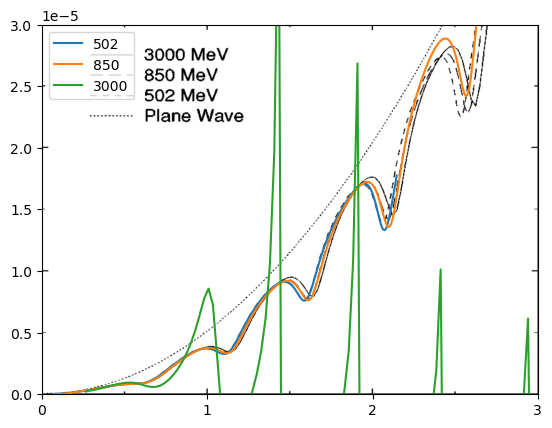

In [141]:
img = plt.imread("../data_electronscattering/Pb208_ACP_ref3.png")
#plt.figure(figsize=(10,10))
plt.imshow(img, extent=[0,3,0, 3e-5],aspect='auto')
#
plt.plot(q1_fm,A_PV_502,label='502')
plt.plot(q2_fm,A_PV_850,label='850')
plt.plot(q3_fm,A_PV_3000,label='3000')
#
plt.xticks(np.arange(0,16,1))
plt.xlim(0,3)
plt.ylim(0,3e-5)
plt.legend()

# H4

### Optimise Settings

In [31]:
#He3_ref_test = phr.nuclei.references.load_reference_nucleus(2,3)
#He3_ref_test.weak_density = partial(weak_density_model,lam=1.00,nucleus=He3_ref_test)
#He3_ref_test.update_dependencies()

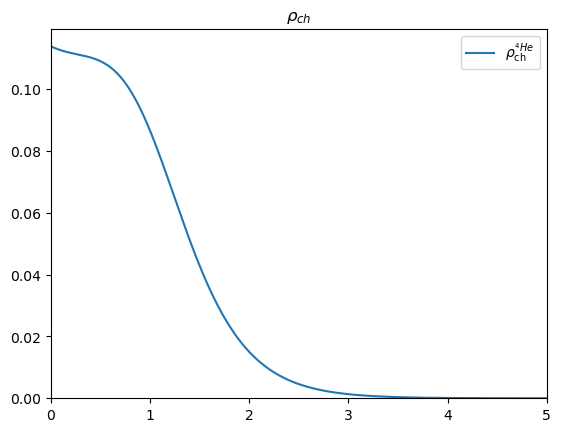

In [18]:
r=np.arange(0,5,1e-2)
plt.title(r'$\rho_{ch}$')
plt.plot(r,He4_test1.charge_density(r),label=r'$\rho^{^{4}He}_\operatorname{ch}$')
#plt.plot(r,He3_ref_test.charge_density(r),label=r'$\rho^\operatorname{ref,^{3}He}_\operatorname{ch}$')
plt.xlim(0,5)
plt.ylim(0,)
plt.legend()

In [47]:
# delta diff does not converge but only goes down to about 1e-9, a phase_difference_limit below that level will not converge

In [19]:
theta_deg=np.arange(1,60,1e-1)
E_MeV=850
A_PV_ref_test = phr.dirac_solvers.post_processing.crosssection.left_right_asymmetry_lepton_nucleus_scattering(E_MeV,theta_deg*pi/180,He4_test1,verbose=True,**{'method': 'DOP853', 'N_partial_waves': 50, 'atol': 1e-12, 'rtol': 1e-12, 'energy_norm': 197.3269804, 'phase_difference_limit': 1e-8})

Calculate left crosssection ...
E= 656.2172129783868 MeV
r0= 0.0001 fm
rc= 19.900000000000002 fm
Calculate phaseshift for kappa= -1 , delta_diff= -0.01971213412078754
Calculate phaseshift for kappa= -2 , delta_diff= -0.009633075763178178
Calculate phaseshift for kappa= -3 , delta_diff= -0.005011638651752026
Calculate phaseshift for kappa= -4 , delta_diff= -0.0025943594787944946
Calculate phaseshift for kappa= -5 , delta_diff= -0.0013209090158188275
Calculate phaseshift for kappa= -6 , delta_diff= -0.0006617440494489646
Calculate phaseshift for kappa= -7 , delta_diff= -0.0003270792437835013
Calculate phaseshift for kappa= -8 , delta_diff= -0.0001598775381106421
Calculate phaseshift for kappa= -9 , delta_diff= -7.740971979863787e-05
Calculate phaseshift for kappa= -10 , delta_diff= -3.716434500078414e-05
Calculate phaseshift for kappa= -11 , delta_diff= -1.7703556831172307e-05
Calculate phaseshift for kappa= -12 , delta_diff= -8.370191755702194e-06
Calculate phaseshift for kappa= -13 , d

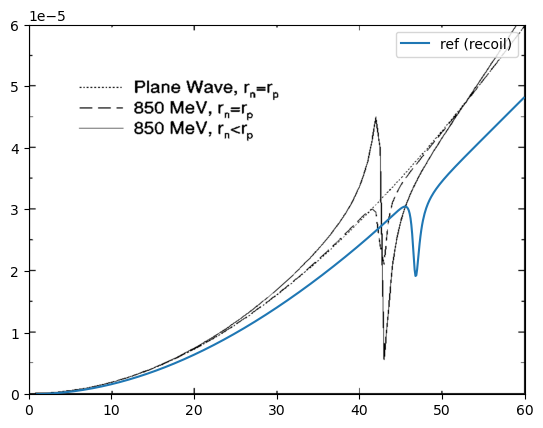

In [48]:
img = plt.imread("../data_electronscattering/He4_ACP_ref.png")
#plt.figure(figsize=(10,10))
plt.imshow(img, extent=[0,60.0,0, 6e-5],aspect='auto')
plt.plot(theta_deg,A_PV_ref_test,label='ref (recoil)')
#plt.plot(theta_deg,A_PV_ref_test1,label='ref 1 (no recoil)')
#plt.plot(theta_deg,A_PV_ref_test2,label='ref 2 (no recoil)')
#
#plt.xticks(np.arange(0,16,1))
plt.xlim(0,60)
plt.ylim(0,6e-5)
plt.legend()

In [ ]:
# rerun with changed minimum phase shift difference

In [67]:
theta_deg=np.arange(1,60,1e-1)
E_MeV=850
args_APV_He4=phr.dirac_solvers.post_processing.crosssection.optimise_left_right_asymmetry_precision(E_MeV,theta_deg*pi/180,He4_test1,left_right_asymmetry_precision=1e-2)

KeyboardInterrupt: 

In [ ]:
#args_APV_He3={'method': 'DOP853', 'N_partial_waves': 80, 'atol': 1e-11, 'rtol': 1e-11, 'energy_norm': 0.1973269804, 'phase_difference_limit': 1e-07}

In [68]:
theta_deg=np.arange(1,60,1e-1)
E_MeV=850
A_PV_ref_test_opt = phr.dirac_solvers.post_processing.crosssection.left_right_asymmetry_lepton_nucleus_scattering(E_MeV,theta_deg*pi/180,He4_test1,verbose=False,**args_APV_He4)

NameError: name 'args_APV_He4' is not defined

In [ ]:
img = plt.imread("../data_electronscattering/He4_ACP_ref.png")
#plt.figure(figsize=(10,10))
plt.imshow(img, extent=[0,60.0,0, 6e-5],aspect='auto')
#
plt.plot(theta_deg,A_PV_ref_test,label='ref test')
plt.plot(theta_deg,A_PV_ref_test_opt,label='ref test opf')
#
#plt.xticks(np.arange(0,16,1))
plt.xlim(0,60)
plt.ylim(0,6e-5)
plt.legend()

### Compare

In [26]:
args_APV_He4={'method': 'DOP853', 'N_partial_waves': 100, 'atol': 1e-12, 'rtol': 1e-12, 'energy_norm': 197.3269804, 'phase_difference_limit': 1e-8}

In [27]:
theta_deg=np.arange(1,60,1e-1)
E_MeV=850
print('Start')
A_PV0 = phr.dirac_solvers.post_processing.crosssection.left_right_asymmetry_lepton_nucleus_scattering(E_MeV,theta_deg*pi/180,He4_test1,recoil=True,verbose=False,**args_APV_He4)
print('APV0 done')
A_PV1 = phr.dirac_solvers.post_processing.crosssection.left_right_asymmetry_lepton_nucleus_scattering(E_MeV,theta_deg*pi/180,He4_test1,recoil=False,verbose=False,**args_APV_He4)
print('APV1 done')
A_PV2 = phr.dirac_solvers.post_processing.crosssection.left_right_asymmetry_lepton_nucleus_scattering(E_MeV,theta_deg*pi/180,He4_test2,recoil=False,verbose=False,**args_APV_He4)
print('APV2 done')

Start
[ 9.99999981e-01 -1.11244889e-04]
[ 9.99999981e-01 -1.11244889e-04]
0.0004816078073455055
0.8577688624242953
1781.0526518498314
[ 2.36952678e-02 -2.63597749e-06]
[ 2.36952678e-02 -2.63597749e-06]
[ 1.11244889e-04 -7.42525537e-09]
[ 1.11244889e-04 -7.42525537e-09]
5.336638348745868e-08
1.1557265366397442
21656452.266647313
[ 2.14885120e-04 -1.43429231e-08]
[ 2.14885120e-04 -1.43429231e-08]
[ 7.42525537e-09 -3.54009310e-13]
[ 7.42525537e-09 -3.54009310e-13]
3.548947886173292e-12
-0.7147507328000257
201397922912.50482
[ 2.22829408e-06 -1.06236999e-10]
[ 2.22829408e-06 -1.06236999e-10]
[ 3.54009310e-13 -1.31272424e-17]
[ 3.54009310e-13 -1.31272424e-17]
1.6859001479988777e-16
-1.3162666741155908
7807500792250165.0
[ 1.13173301e-08 -4.19665049e-13]
[ 1.13173301e-08 -4.19665049e-13]
[ 1.31272424e-17 -3.98274175e-22]
[ 1.31272424e-17 -3.98274175e-22]
6.229187626744945e-21
0.2918017811791375
4.6844275476033176e+19
[ 1.4610724e-10 -4.4328229e-15]
[ 1.4610724e-10 -4.4328229e-15]
[ 3.9827417

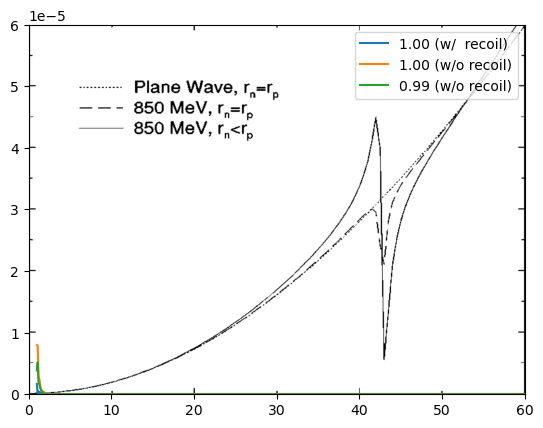

In [28]:
img = plt.imread("../data_electronscattering/He4_ACP_ref.png")
#plt.figure(figsize=(10,10))
plt.imshow(img, extent=[0,60.0,0, 6e-5],aspect='auto')
#
plt.plot(theta_deg,A_PV0,label='1.00 (w/  recoil)')
plt.plot(theta_deg,A_PV1,label='1.00 (w/o recoil)')
plt.plot(theta_deg,A_PV2,label='0.99 (w/o recoil)')
#
#plt.xticks(np.arange(0,16,1))
plt.xlim(0,60)
plt.ylim(0,6e-5)
plt.legend()

# pictures

(0.0, 4e-06)

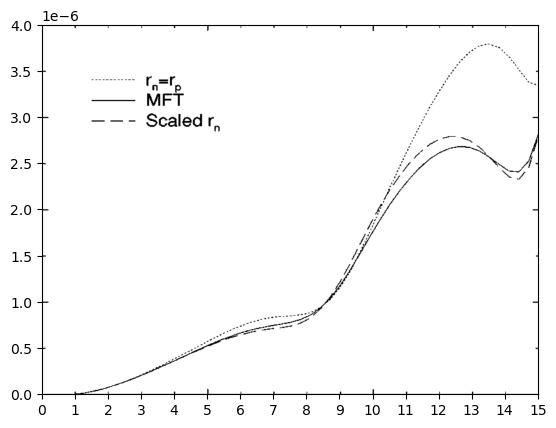

In [15]:
img = plt.imread("../data_electronscattering/Pb208_ACP_ref.png")
#plt.figure(figsize=(10,10))
plt.imshow(img, extent=[0,15.04,-0.01e-6, 3.99e-6],aspect='auto')
#
plt.xticks(np.arange(0,16,1))
plt.xlim(0,15)
plt.ylim(0,4e-6)
#plt.legend()

(0.0, 5e-05)

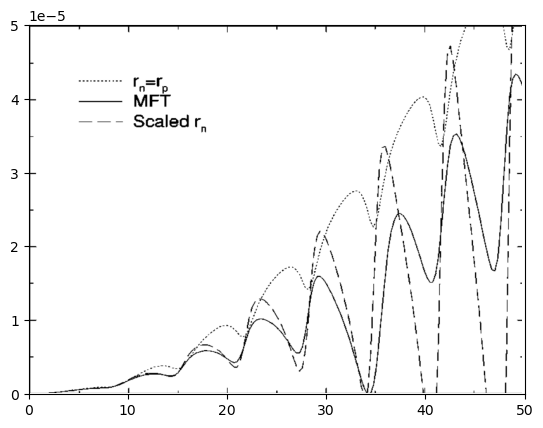

In [182]:
img = plt.imread("../data_electronscattering/Pb208_ACP_ref2.png")
#plt.figure(figsize=(10,10))
plt.imshow(img, extent=[0.1,49.6,0.02e-5, 4.98e-5],aspect='auto')
#
plt.xlim(0,50)
plt.ylim(0,5e-5)
#plt.legend()

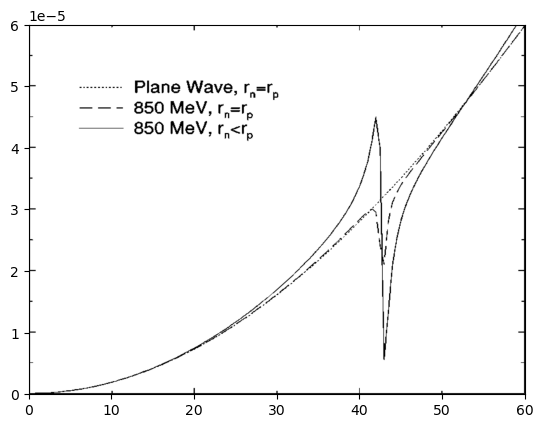

In [46]:
img = plt.imread("../data_electronscattering/He4_ACP_ref.png")
#plt.figure(figsize=(10,10))
plt.imshow(img, extent=[0,60.0,0, 6e-5],aspect='auto')
#

(0.0, 3e-05)

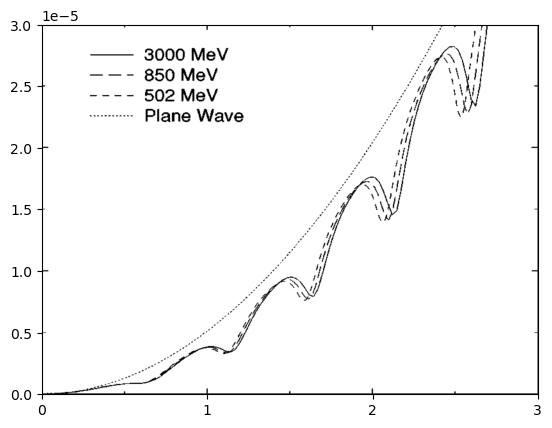

In [94]:
img = plt.imread("../data_electronscattering/Pb208_ACP_ref3.png")
#plt.figure(figsize=(10,10))
plt.imshow(img, extent=[0,3,0, 3e-5],aspect='auto')
#
plt.xticks(np.arange(0,16,1))
plt.xlim(0,3)
plt.ylim(0,3e-5)
#plt.legend()